# Single neuron: logistic regression



In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(tf.__version__, tf.test.gpu_device_name())
device_lib.list_local_devices()

2.3.0 /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5322634133399952045, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10721296895053306602
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14077079049749694694
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15695549568
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15433891594253777273
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load the data

In [ ]:
data = load_breast_cancer()

## Play with the data

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
print(data.data.shape)
print(data.data)

(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(data.target.shape)
print(data.target_names)
print(data.target)

(569,)
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data.target

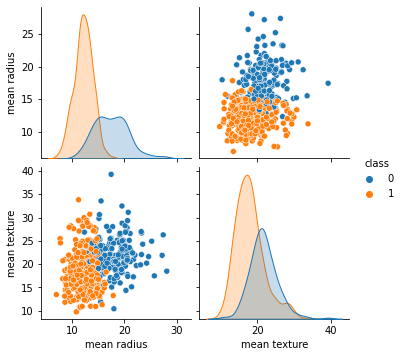

In [ ]:
g = sns.pairplot(df, vars=['mean radius', 'mean texture'], hue="class")

In [ ]:
df.values.shape

(569, 31)

In [ ]:
X = data.data
y = np.expand_dims(data.target, axis=1) 

In [ ]:
X.shape, y.shape

((569, 30), (569, 1))

## Prepare the data

Split the data: train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print( X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(398, 30) (398, 1)
(171, 30) (171, 1)


Scale the data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print( X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(398, 30) (398, 1)
(171, 30) (171, 1)


## Build the model

In [ ]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(30,)) )
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile( optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),
              loss='binary_crossentropy', metrics=['accuracy'] ) 

## Train the model

In [ ]:
result = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=500)

Epoch 1/500
13/13 [==============================] - 0s 13ms/step - loss: 0.4569 - accuracy: 0.7739 - val_loss: 0.4161 - val_accuracy: 0.8187
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4072 - accuracy: 0.8090 - val_loss: 0.3504 - val_accuracy: 0.8596
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8668 - val_loss: 0.3015 - val_accuracy: 0.8889
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8945 - val_loss: 0.2663 - val_accuracy: 0.9064
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2845 - accuracy: 0.9121 - val_loss: 0.2414 - val_accuracy: 0.9357
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 0.2631 - accuracy: 0.9271 - val_loss: 0.2227 - val_accuracy: 0.9415
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.9422 - val_loss: 0.2092 - val_accuracy: 0.9415
Epoch 8/500


In [ ]:
result.history['loss'][-1]

0.05662519484758377

## Evaluate the model

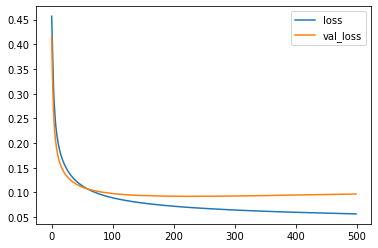

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

## Make predictions

In [ ]:
y_test_hat = model.predict(X_test)
y_test_hat = np.around(y_test_hat)

In [ ]:
print('Acc: ', np.sum(y_test_hat == y_test)/y_test.shape[0])

Acc:  0.9766081871345029


In [ ]:
w, b = model.layers[0].get_weights()
print(w)
print(b)

[[-0.54729676]
 [-0.9171215 ]
 [-0.68468726]
 [-0.51240003]
 [-0.11044142]
 [ 0.30996144]
 [-0.6090003 ]
 [-0.6435052 ]
 [-0.3542741 ]
 [ 0.50824034]
 [-0.33443254]
 [ 0.2517621 ]
 [-0.46548852]
 [-0.8300626 ]
 [-0.14832847]
 [ 0.12751439]
 [ 0.02524506]
 [ 0.23275015]
 [ 0.31033862]
 [ 0.2466735 ]
 [-0.6212403 ]
 [-0.8100154 ]
 [-0.83651286]
 [-1.0483848 ]
 [-0.70227283]
 [ 0.04591379]
 [-0.5835918 ]
 [-0.98899245]
 [-0.5726194 ]
 [-0.38560236]]
[0.8651579]
